In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import pandas as pd
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
train = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment4/train_knn.txt',sep=',', header = None)
train

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


In [ ]:
test = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment4/test_knn.txt',sep=',', header = None)
test

,0,1
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


### Plotting training samples

In [ ]:
class1 = []
class2 = []
test_class1 = []
test_class2 = []


In [ ]:
for i in range(len(train)):
  if(train[2][i] == 1):
    class1.append([train[0][i],train[1][i]])
  else:
    class2.append([train[0][i],train[1][i]])


In [ ]:
print(class1)
class2

[[7, 7], [7, 4], [6, 4], [7, 5], [7, 6], [6, 7], [6, 6]]


[[3, 4], [2, 3], [3, 2], [4, 3], [3, 3], [4, 4], [1, 4]]

In [ ]:
class1_x = []
class1_y = []
for i in range(len(class1)):
  class1_x.append(class1[i][0])
  class1_y.append(class1[i][1])
class1_x

[7, 7, 6, 7, 7, 6, 6]

In [ ]:
class2_x = []
class2_y = []
for i in range(len(class2)):
  class2_x.append(class2[i][0])
  class2_y.append(class2[i][1])
class2_x

[3, 2, 3, 4, 3, 4, 1]

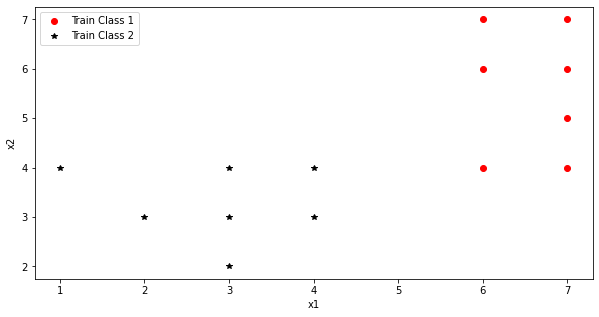

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

###K-NN Algortihm

In [ ]:
k = int(input("Enter the value of K"))
print("k:",k)

Enter the value of K3
k: 3


In [ ]:
def euclidean_distance(train_data, test_data):
	distance = ( (train_data[0] - test_data[0])**2 ) + ( (train_data[1] - test_data[1])**2 )
	return distance

In [ ]:
def find_neighbours(dis):
  neigh = []
  for i in range(k):
    neigh.append(dis[i][1])
  return neigh


In [ ]:
for i in range(len(test)):

  distances = []
  neighbor = []
  testData = [test[0][i],test[1][i]]

  for j in range(len(train)):
    trainData = [train[0][j],train[1][j]]
    dist = euclidean_distance(trainData,testData)
    distances.append([dist, train[2][j]])

  distances.sort(key = lambda x:x[0])
  neighbor = find_neighbours(distances)
  test_class = max(set(neighbor), key = neighbor.count)
  if (test_class == 1):
    test_class1.append(testData)
  else:
    test_class2.append(testData)
  with open('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment4/prediction.txt', 'a') as f:
    f.write('\n\n\nTest: '+str(i+1))
    f.write('\nTest Point: '+ str(testData)) 
    f.write('\nDistance 1: '+ str(distances[0][0]) + '  Class: '+ str(distances[0][1]))
    f.write('\nDistance 2: '+ str(distances[1][0]) + '  Class: '+ str(distances[1][1]))  
    f.write('\nDistance 3: '+ str(distances[2][0]) + '  Class: '+ str(distances[2][1]))
    f.write('\nPredicted Class: '+ str(test_class)) 
     


0
1
1
1
2
2
3
2
4
2
5
2
6
1
7
1
8
1


In [ ]:
print("test class 1: ",test_class1)
print("test class 2: ",test_class2)

test class 1:  [[3, 7], [7, 7], [4, 8], [8, 3], [8, 4]]
test class 2:  [[4, 3], [2, 8], [3, 5], [1, 2]]


In [ ]:
test_class1_x = []
test_class1_y = []
for i in range(len(test_class1)):
  test_class1_x.append(test_class1[i][0])
  test_class1_y.append(test_class1[i][1])
test_class1_x

[3, 7, 4, 8, 8]

In [ ]:
test_class2_x = []
test_class2_y = []
for i in range(len(test_class2)):
  test_class2_x.append(test_class2[i][0])
  test_class2_y.append(test_class2[i][1])
test_class2_x

[4, 2, 3, 1]

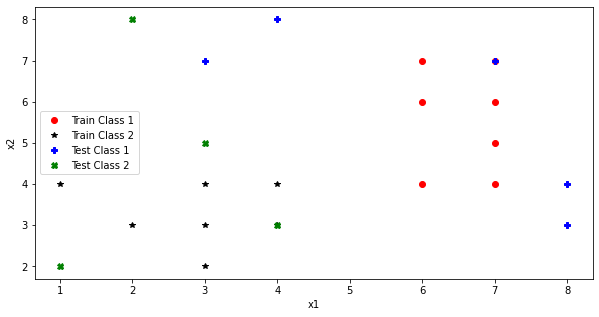

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')

plt.plot(test_class1_x,test_class1_y,'Pb' , label = 'Test Class 1')
plt.plot(test_class2_x,test_class2_y,'Xg' , label = 'Test Class 2')

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()
plt.show()